In [3]:
from __future__ import print_function
import os
import sys
import time
import numpy as np
import pylab as pl
import cv2
import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl
from skimage.color import rgb2gray
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(12,12)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

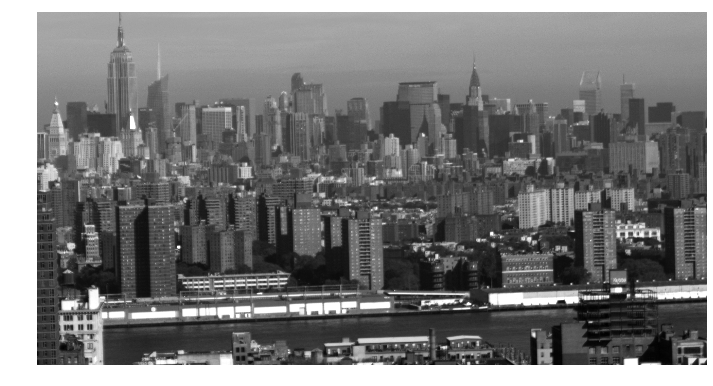

In [5]:
rawimg = np.fromfile("img1.raw", np.uint8)
#rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
#img2d = img2d.astype(float)
showme(img2d, cmap = 'gray')

In [6]:
smoothImg = nd.filters.gaussian_filter(img2d, [8, 8])
#showme(smoothImg)
#showme((img2d - smoothImg)**2)
#pl.savefig("smoothedDiff.png")

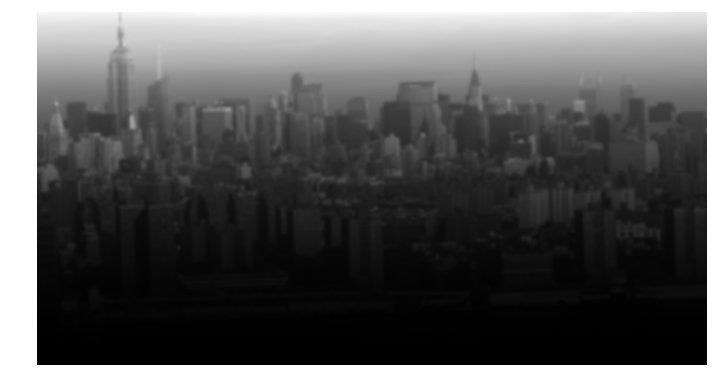

In [7]:
#skfl.sobel?
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
#imgedge = skfl.sobel(smoothImgEn)
showme(smoothImgEn, cmap = 'gray')
#showme(imgedge, cmap = 'gray')

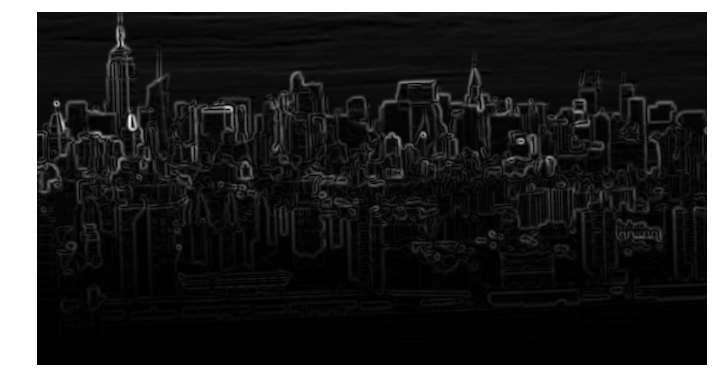

In [8]:
imgedge = skfl.sobel(smoothImgEn)
showme(imgedge, cmap = 'gray')

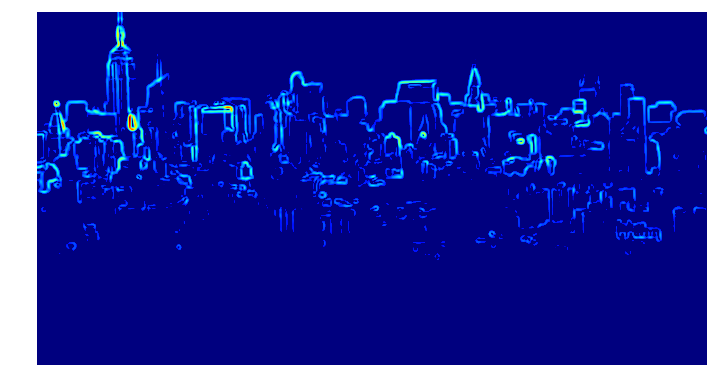

In [9]:
imgedge2 = imgedge.copy()
imgedge2[imgedge < 0.0025] = 0.0
showme(imgedge2)

In [12]:
#yTop = imgedge2.sort(0)
ymax = imgedge2.max(0)


envelope = [np.where(imgedge[:,i] == ymax[i])[0][-1] for i in range(cols)][1:]



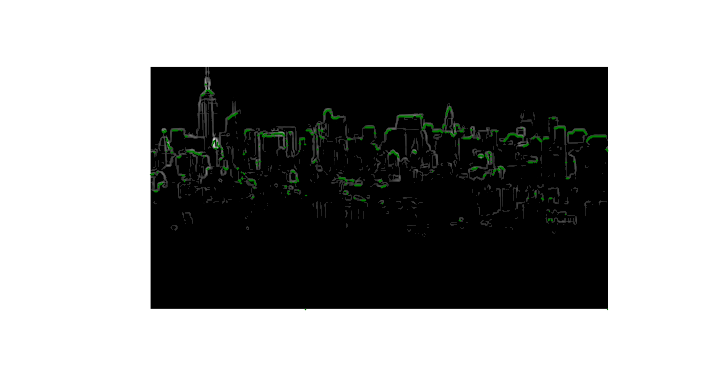

In [13]:
showme(imgedge2, cmap = 'gray')
pl.plot(np.arange(imgedge2.shape[1])[1:], envelope, 'g.', ms = 1.5)

In [14]:
grad_max = []

for i in range(cols):
    grad = np.gradient(imgedge2[:,i])
    grad_max.append(np.argpartition(grad, -20, axis = 0)[-20:].min())
#%timeit skyline()    

In [15]:
rows = imgedge2.shape[0]
cols = imgedge2.shape[1]

grad_1 = [np.argpartition(np.gradient(imgedge2[:, i]), -20)[-20:].min() for i in range(cols)]

grad_2 = [np.argsort(np.gradient(imgedge2[:, i]))[-20:].min() for i in range(cols)]

#grad_min = [np.argmin(np.gradient(imgedge2[:, i])) for i in range(cols)]


#%timeit grad_min

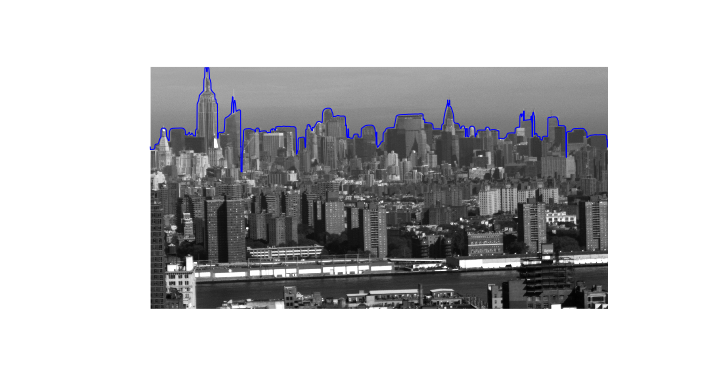

In [16]:
showme(img2d, cmap = 'gray')
plt.plot(np.arange(imgedge2.shape[1]), grad_max, 'b-', ms = 1.5)
#plt.plot(np.arange(imgedge2.shape[1]), grad_2, 'b-', ms = 1.5)
#plt.plot(np.arange(imgedge2.shape[1]), grad_min, 'r.', ms = 1.5)

#plt.axhline(y = threshold)

In [17]:

n = 5
x_rand = np.random.choice(img2d.shape[1], n)

In [18]:
grad = np.array(grad_max)

In [23]:
skyline = grad[x_rand]
city = np.array([1000]*n)
sky = np.array([150]*n)

skyline, city

(array([622, 470, 469, 620, 442]), array([1000, 1000, 1000, 1000, 1000]))

ValueError: x and y must have same first dimension

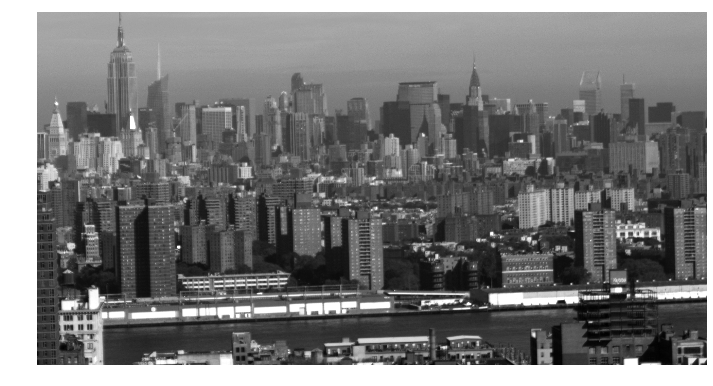

In [51]:
showme(img2d, cmap = 'gray')

plt.plot(index[0], index[1], 'r*')
#plt.plot(x_rand, city, 'b*')
#plt.plot(x_rand, sky, 'g*')
plt.show()

In [24]:
value_sky = img2d[sky, x_rand].flatten()
value_line = img2d[skyline, x_rand].flatten()
value_city = img2d[city, x_rand].flatten()

In [25]:
value_sky

array([ 0.64836601,  0.6496732 ,  0.65228758,  0.69281046,  0.69803922])

In [52]:
index = [[skyline, city, sky], x_rand]


In [53]:
img2d[index]

array([[ 0.50196078,  0.58954248,  0.55816993,  0.56339869,  0.61176471],
       [ 0.42091503,  0.33202614,  0.30849673,  0.44836601,  0.37647059],
       [ 0.64836601,  0.6496732 ,  0.65228758,  0.69281046,  0.69803922]])